zhouguangyaoshidashabi
if postprocess is not None:
    output,target_weight = POSTProcess.MAIN

In [1]:
transforms = A.Compose([A.RandomBrightnessContrast(p = 0.5), 
                        A.SafeRotate(interpolation = cv2.INTER_LINEAR, border_mode = cv2.BORDER_CONSTANT, value = 0, p = 0.5),
                        #A.Normalize()
                       ],
                       keypoint_params = A.KeypointParams(format = 'xy', remove_invisible = False))

NameError: name 'A' is not defined

In [ ]:
transforms = A.Compose([A.SafeRotate(interpolation = cv2.INTER_LINEAR, border_mode = cv2.BORDER_CONSTANT, value = 0, p = 0.5),
                       ],
                       keypoint_params = A.KeypointParams(format = 'xy', remove_invisible = False))

In [ ]:
transforms = A.Compose([A.RandomBrightnessContrast(p = 0.5), A.SafeRotate(interpolation = cv2.INTER_LINEAR, border_mode = cv2.BORDER_CONSTANT, value = 0, p = 0.5),
                        #A.Normalize()
                       ],
                       keypoint_params = A.KeypointParams(format = 'xy', remove_invisible = False))

In [ ]:
transforms = A.Compose([A.SafeRotate(interpolation = cv2.INTER_LINEAR, border_mode = cv2.BORDER_CONSTANT, value = 0, p = 0.5),
                        A.Resize(height=224,
                                    width=224,
                                    interpolation = cv2.INTER_LINEAR),
                        #A.Normalize()
                       ],
                       keypoint_params = A.KeypointParams(format = 'xy', remove_invisible = False))

In [3]:
from Pipelines import TrainingFrame
from CustomDataset import COCO2017Keypoint
from Models.Head import FullyConnectedHead
from Models.Backbone import ResNet
from Models.Neck import GlobalAvgPool
from utils import GEN34to172
from torch.nn import MSELoss
import albumentations as A
from utils import AvgDist
import cv2
####
from torch import stack, FloatTensor, stack
from torch.utils.data import DataLoader
from torch.optim.lr_scheduler import StepLR
from torch.optim import Adam

In [4]:
from tqdm import tqdm
from PIL import Image
import numpy as np
import torch

In [4]:
transforms = A.Compose([A.RandomBrightnessContrast(p = 0.5), 
                        A.SafeRotate(interpolation = cv2.INTER_LINEAR, border_mode = cv2.BORDER_CONSTANT, value = 0, p = 0.5),
                        A.Resize(height=224,
                                    width=224,
                                    interpolation = cv2.INTER_LINEAR),
                        #A.Normalize()
                       ],
                       keypoint_params = A.KeypointParams(format = 'xy', remove_invisible = False))

In [5]:
def clt(batch):
    xxx = np.ones((3,3,3))
    xxx = torch.FloatTensor(xxx)
    img = []
    kypt = []
    wght = []
    for sample in batch:
        img.append(xxx)
        kypt.append(sample[1]['keypoints'])
        wght.append(sample[1]['kweights'])
    anno = {'keypoints': FloatTensor(kypt), 'kweights': FloatTensor(wght)}
    return stack(img, 0), anno

In [6]:
Dataset = DataLoader(dataset = COCO2017Keypoint(PATH = 'PATH.json',
                                                transforms = transforms,
                                                mode = 'Train',),
                     batch_size = 1,
                     shuffle = False,
                     num_workers = 16,
                     collate_fn = clt)

loading annotations into memory...
Done (t=3.39s)
creating index...
index created!


In [8]:
for idx, (img , anno) in enumerate(tqdm(Dataset)):
    pass

  0%|                                                                                                       | 0/262465 [00:00<?, ?it/s]


TypeError: Caught TypeError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "/home/kylrzhou/anaconda3/envs/exp/lib/python3.7/site-packages/torch/utils/data/_utils/worker.py", line 302, in _worker_loop
    data = fetcher.fetch(index)
  File "/home/kylrzhou/anaconda3/envs/exp/lib/python3.7/site-packages/torch/utils/data/_utils/fetch.py", line 61, in fetch
    return self.collate_fn(data)
  File "/tmp/ipykernel_3916/1652717076.py", line 9, in clt
    kypt.append(sample[1]['keypoints'])
TypeError: list indices must be integers or slices, not str


In [ ]:
Backbone = ResNet(18)
Neck = GlobalAvgPool(output_size = (1, 1), output_channels = 512)
Head = FullyConnectedHead([512, 256, 128, 34])

In [ ]:
Gen = GEN34to172()

In [ ]:
#Criterion = MSELoss()
def weighted_mse_loss(input, target, weight):
    weight = stack((weight, weight), dim = -1)
    x = input - target
    x = x ** 2
    x = weight * x
    x = x.sum()
    x = x/weight.sum()
    return [x], ['WeightedMSE']
#Criterion = weighted_mse_loss

In [ ]:
log_dir = '/root/autodl-tmp/exp/exp.json'

In [ ]:
TrainingFrame(Dataset=Dataset,
              ValDataset=Dataset,
              Backbone=Backbone, BackbonePTH=None,
              Neck=Neck, NeckPTH=None,
              Head=Head, HeadPTH=None,
              PostProcess=Gen,
              GTPreProcess=Gen,
              Epochs=1,#
              Criterion=weighted_mse_loss,#
              Metric4Train=AvgDist,#
              Metric4Val=AvgDist,
              Optimizer=Adam,
              Scheduler=StepLR,
              Device=None,
              LogInterval=1,
              SaveInterval=10,
              ValInterval=10,
              log_dir=log_dir)

In [ ]:
Dataset = DataLoader(dataset = COCO2017Keypoint(PATH = 'PATH.json',
                                                mode = 'Train',),
                     batch_size = 1,
                     shuffle = False,
                     num_workers = 16,)

In [ ]:
xxx = np.ones((1,1,1,1))
xxx = torch.FloatTensor(xxx)
for idx, (img, anno) in enumerate(tqdm(Dataset)):
    if type(img) != type(xxx):
        print('TypeError')
    if len(img.shape) == 4:
        pass
    else:
        print(img.shape, 'abnormal')

In [ ]:
cv2.__version__

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [5]:
transforms = A.Compose([A.RandomBrightnessContrast(p = 0.5), 
                        A.SafeRotate(interpolation = cv2.INTER_LINEAR, border_mode = cv2.BORDER_CONSTANT, value = 0, p = 0.5),
                        A.Resize(height=224,
                                    width=224,
                                    interpolation = cv2.INTER_LINEAR),
                        #A.Normalize()
                       ])

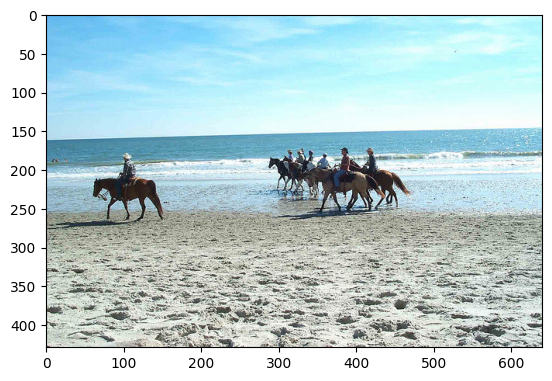

In [9]:
img = Image.open('/home/kylrzhou/Datasets/HumanPoseEstimation/train2017/000000550395.jpg')
plt.imshow(img)
plt.show()

In [10]:
img = transforms(image = np.array(img))

TypeError: Image data of dtype object cannot be converted to float

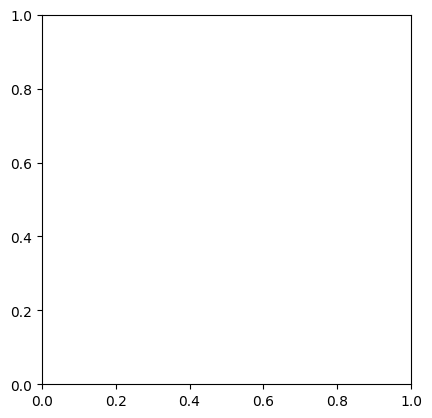

In [11]:

plt.imshow(img)

plt.show()

In [12]:
import torch

In [13]:
x = torch.randn(3,3,3)

In [14]:
y = torch.cat((x,x,x),0)

In [20]:
y.dtype

torch.float32

In [ ]:
torch.